# Notes on Kalman Filter

## Kalman Filter

We had the following dynamic linear model for the Kalman filter:

$$
\begin{align}
x_{t+1} &= A x_t + w_t,   \quad w_t   \sim N(0,Q) \\
y_t     &= G x_t + \nu_t, \quad \nu_t \sim N(0,R) \\
x_1 & \sim N(x_0, \Sigma_0)
\end{align}
$$

With $x_t$ describing the state space evolution, $y_t$ the observations, $A, Q, G, R, \Sigma_0$ matrices of appropriate dimensions, $w_t$ the evolution error and $\nu_t$ the observation error. The Kalman filter provides recursive estimators for $x_t$ via:

$$
\begin{align}
K_{t}         &= A \Sigma_t G’ (G \Sigma_t G’ + R)^{-1}       \\
\hat{x}_{t+1} &= A \hat{x_t} + K_{t} (y_t – G \hat{x})        \\
\Sigma_{t+1}  &= A \Sigma_t A’ – K_{t} G \Sigma_t A’ + Q 
\end{align}
$$

In the case of nonlinearities on the right hand side of either the state $x_t$ or observation $y_t$ equation the extended Kalman filter uses a simple and elegant trick: Taylor series of the first order, or in other words, we simply linearise the right hand side. The matrices $A$ and $G$ will be the Jacobian matrices of the respected vector functions.

## Logistic growth

As an example let's use a logistic growth model. The logistic growth model can be written as a time-invariant dynamical system with growth rate (r) and carrying capacity (k):
\begin{equation}
\begin{aligned} 
\dot{p} & = r p \Big(1 – \frac{p}{k} \Big) 
\end{aligned} 
\end{equation}

The above ordinary differential equation has the [well known analytical solution](https://en.wikipedia.org/wiki/Logistic_function):
$$
p(t) = \frac{k \, p_0 \, e^{rt}}{k + p_0\,(e^{rt} – 1)} 
$$


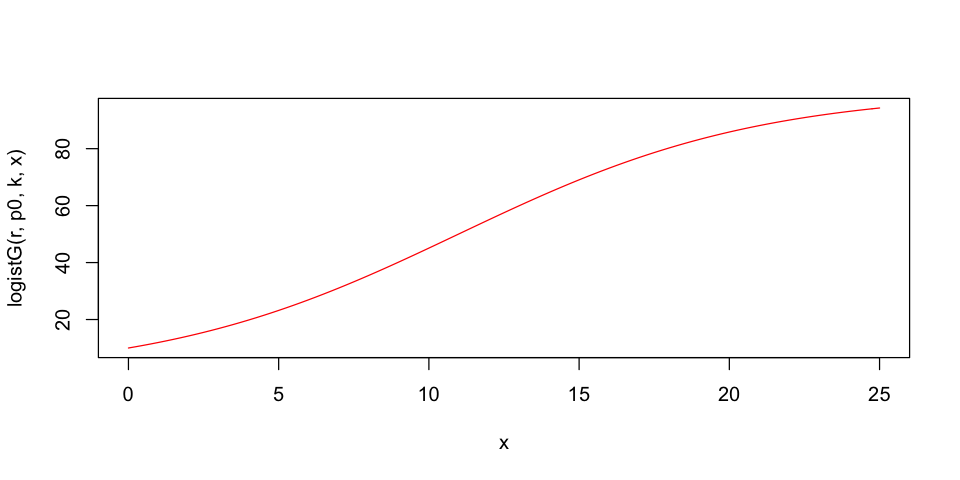

In [6]:
options(repr.plot.width=8, repr.plot.height=4)

# Logistic growth function
logistG <- function(r, p, k, t){
  k * p * exp(r*t) / (k + p * (exp(r*t) - 1))
}

k      <- 100
p0     <- 0.1*k
r      <- 0.2
deltaT <- 0.1
nObs   <- 250
time   <- c(1:nObs)*deltaT

curve(logistG(r, p0, k, x),  from=0, to=max(time), col=2, lwd=1)


We assume the growth rate $r$ is unknown and drawn from a normal distribution ${\cal{N}}(\mu_r, \sigma_r^2)$ but the carrying capacity $k$ is known and we wish to estimate the growth rate by observing noisy values $y_i$ of the population at discrete times $t_0 = 0, t_1 = \Delta T, t_2 = 2\Delta T, \ldots$. Note that $p_t$ is entirely deterministic and its stochasticity is only as a result of the fact that the unknown parameter of the logistic equation is sampled from a normal distribution


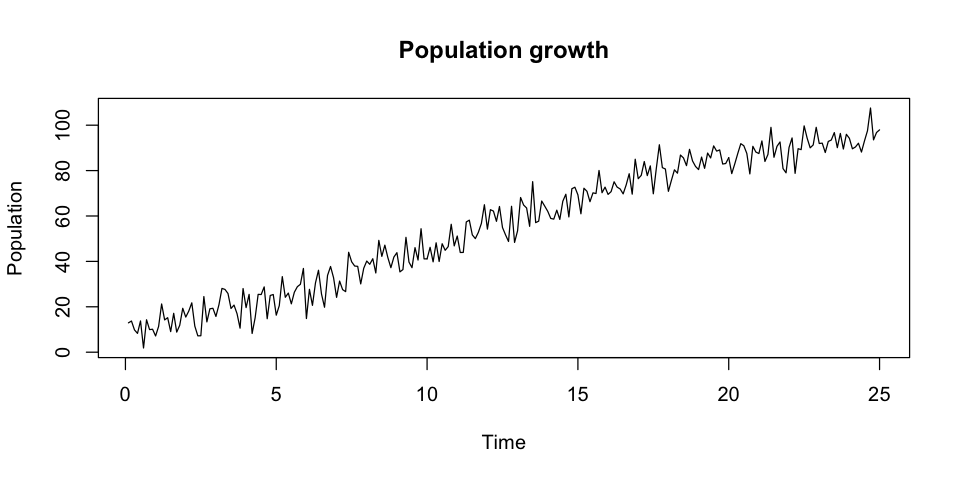

In [7]:
# Let's create some sample data:
set.seed(12345)

pop <- c(p0, logistG(r, p0, k, (1:(nObs-1))*deltaT))

obsVariance <- 25
nu <- rnorm(nObs, mean=0, sd=sqrt(obsVariance)) 

pop<-pop + nu

plot(y=pop, x=time, t='l', main="Population growth", 
       xlab="Time", ylab="Population")

## Extended Kalman filter

The state space and observation model can then be written as:
\begin{equation}
\begin{aligned} 
r_i &= r_{i-1} \\ 
p_i &= \frac{kp_{i-1}\exp(r_{i-1}\Delta T)}{k + p_{i-1}(\exp(r_{i-1}\Delta T) – 1)} \\
y_i &= \begin{bmatrix} 0   &  1   \end{bmatrix} 
       \begin{bmatrix} r_i \\ p_i \end{bmatrix} + 
       \begin{bmatrix} 0   \\ \nu \end{bmatrix}
\end{aligned} 
\end{equation}